# Volume Cropping Tool with Ink Labels

This tool helps you **crop a 3D volume along with its associated ink labels**.

## Workflow

### 1. Visualize
- Load the volume and its ink labels.  
- Inspect them to decide which region you want to crop.

### 2. Crop
- Specify the rectangle or region of interest (ROI).  
- Crop both the volume layers and the corresponding ink labels.

### 3. Save
- Save the cropped region.  
- Optionally, save the remaining part of the volume if you want to keep it for later use.

## Notes
- Ensure the ink labels align with the volume layers to maintain proper correspondence.  
- You can process a subset of layers by configuring the index range (e.g., layers 15–40).

## Example Usage

1. **Select Fragment**  
   Crop `frag1` from folder:  
   ```python
   FRAG_PATH = '../train_scrolls/frag1'
   RECT = (2000, 1400, 2400, 1400)

2. **Visualize**
    Open the images and check which part you want to crop.

3. **Pick Configuration**

    ```python
    RECT_OUT_NAME = 'rectfrag1'           # No underscores (_) recommended
    REMAINING_OUT_NAME = 'remainingfrag1' # No underscores (_) recommended
    start_idx, end_idx = 15, 40           # Select layers to process and save
    KEEP_REMAINING = True                 # Keep remaining part or not

4. **Crop**

5. **Check Results**

    Cropped rectangle images are saved in "../train_scrolls/rectfrag1/layers"

    Remaining images (`if KEEP_REMAINING=True`) are saved in "../train_scrolls/remainingfrag1/layers"


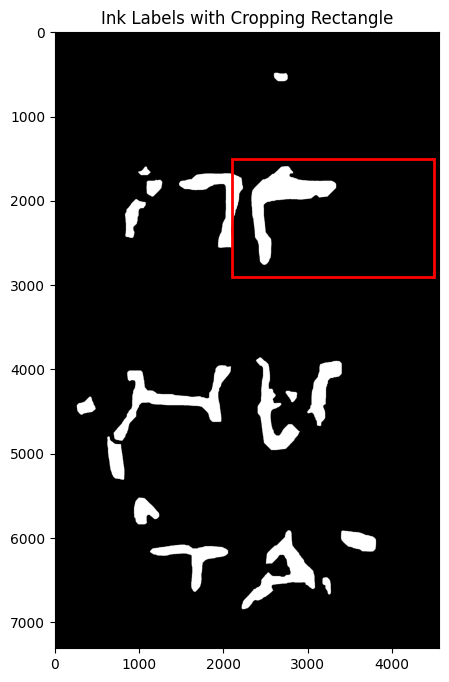

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/Frag5'  # Path to fragment/Segment directory
RECT = (2100, 1500, 2400, 1400)        # (x, y, width, height)

# =================================
inklabel_path = None
for fname in os.listdir(FRAG_PATH):
    if 'inklabels' in fname.lower() and fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        inklabel_path = os.path.join(FRAG_PATH, fname)
        break
img = Image.open(inklabel_path)

# Plot the inklabels with rectangle
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img, cmap='gray')
x, y, w, h = RECT
rect_patch = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect_patch)
ax.set_title("Ink Labels with Cropping Rectangle")
plt.show()

In [5]:
from tqdm import tqdm
import numpy as np

# ==== CONFIGURABLE PART ====
RECT_OUT_NAME = 'rect52'      # No _ recommended
REMAINING_OUT_NAME = 'remaining52'  # No _ recommended
start_idx, end_idx = 15, 45      # Select layers to process and save
KEEP_REMAINING = True            # Keep remaining part or not
# ============================

frag_name = os.path.basename(FRAG_PATH.rstrip('/'))
LAYER_DIR = os.path.join(FRAG_PATH, 'layers')

RECT_OUT = os.path.join("../train_scrolls", RECT_OUT_NAME)
REMAINING_OUT = os.path.join("../train_scrolls", REMAINING_OUT_NAME)

RECT_LAYER_OUT = os.path.join(RECT_OUT, 'layers')
REMAINING_LAYER_OUT = os.path.join(REMAINING_OUT, 'layers')

# Create necessary directories
os.makedirs(RECT_LAYER_OUT, exist_ok=True)
if KEEP_REMAINING:
    os.makedirs(REMAINING_LAYER_OUT, exist_ok=True)

def split_image(img_path, rect, out_name,rem_outname, out_subdir=None, keep_remaining=True):
    x, y, w, h = rect
    img = Image.open(img_path)

    if img.mode in ["RGBA", "RGB"]:
        img = img.convert("L")

    # Crop rectangle
    rect_crop = img.crop((x, y, x + w, y + h))
    rect_crop.save(os.path.join(out_subdir[0], out_name))

    # REMAINING (if desired)
    if keep_remaining:
        img_array = np.array(img)
        img_array[y:y+h, x:x+w] = 0  # Zero out cropped region
        if img_array.max() <= 1:
            img_array = (img_array * 255)
        # img_remain = Image.fromarray(img_array)
        img_remain = Image.fromarray(img_array)
        
        img_remain.save(os.path.join(out_subdir[1], rem_outname))

def numerical_sort(fname):
    name, _ = os.path.splitext(fname)
    return int(name)

# List and sort layer files numerically
layer_files = [f for f in os.listdir(LAYER_DIR) if f.lower().endswith(('.tiff', '.tif', '.png', '.jpg', '.jpeg'))]
layer_files = sorted(layer_files, key=numerical_sort)
# layer_files = layer_files[start_idx:end_idx+1]
layer_files = [
    f for f in layer_files
    if start_idx <= int(os.path.splitext(f)[0]) <= end_idx
]


# Process selected layers
for fname in tqdm(layer_files):
    fpath = os.path.join(LAYER_DIR, fname)
    split_image(fpath, RECT, fname, fname, (RECT_LAYER_OUT, REMAINING_LAYER_OUT), keep_remaining=KEEP_REMAINING)

# Process inklabels and mask
for suffix in ['mask.png', 'inklabels.png']:
    fname = f"{frag_name}_{suffix}"
    fpath = os.path.join(FRAG_PATH, fname)
    if os.path.exists(fpath):
        rect_outname = f"{os.path.basename(RECT_OUT)}_{suffix}"
        rem_outname = f"{os.path.basename(REMAINING_OUT)}_{suffix}"
        split_image(fpath, RECT, rect_outname, rem_outname, (RECT_OUT, REMAINING_OUT), keep_remaining=KEEP_REMAINING)

print(f"Cropping complete for {frag_name}.")

100%|██████████| 31/31 [00:04<00:00,  6.77it/s]


Cropping complete for Frag5.


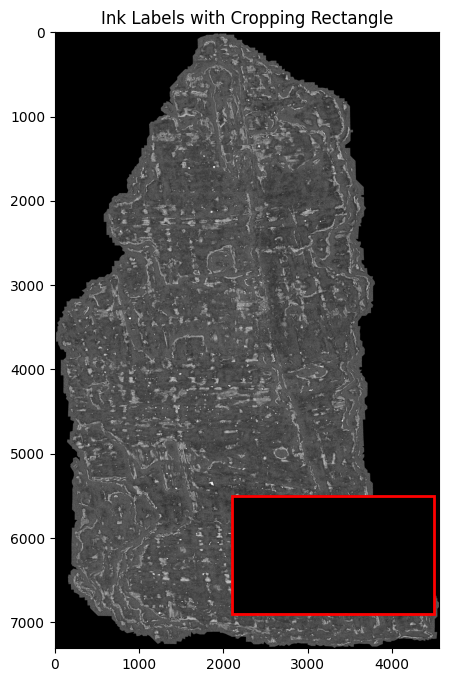

In [15]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/remaining5/layers'  # Path to fragment/Segment directory
RECT = (2100, 5500, 2400, 1400)        # (x, y, width, height)

# =================================
inklabel_path = None
for fname in os.listdir(FRAG_PATH):
    if 'tif' in fname.lower() and fname.lower().endswith(('.tif', '.jpg', '.jpeg')):
        inklabel_path = os.path.join(FRAG_PATH, fname)
        break
img = Image.open(inklabel_path)

# Plot the inklabels with rectangle
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img, cmap='gray')
x, y, w, h = RECT
rect_patch = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect_patch)
ax.set_title("Ink Labels with Cropping Rectangle")
plt.show()

# METRICS


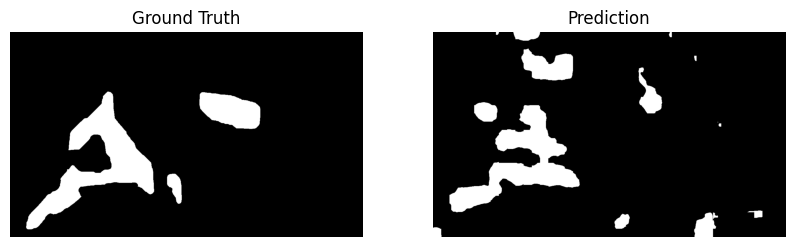

{'AUPRC': 0.5362837779156904,
 'Dice Coefficient': 0.5131951834889811,
 'IoU': 0.3451664790091684,
 'Pixel Accuracy': 0.9030690476190476,
 'Precision': 0.4946407579005601,
 'Recall': 0.5331958455498683}


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, precision_score, recall_score

def resize_image(image, target_shape):
    return cv2.resize(image, (target_shape[1], target_shape[0]), interpolation=cv2.INTER_NEAREST)

def compute_metrics(result_path, ground_truth_path, threshold=0.5):
    # Load images in grayscale
    result = cv2.imread(result_path, cv2.IMREAD_GRAYSCALE)
    ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize ground truth to match result
    ground_truth = resize_image(ground_truth, result.shape)
    try:
        # Normalize to binary using a variable threshold (0 to 1 range)
        threshold_value = int(threshold * 255)
        result = (result > threshold_value).astype(np.uint8)
        ground_truth = (ground_truth > threshold_value).astype(np.uint8)
        
        # Compute pixel accuracy
        pixel_accuracy = accuracy_score(ground_truth.flatten(), result.flatten())
        
        # Compute precision and recall
        precision = precision_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        recall = recall_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        
        # Compute IoU
        intersection = np.logical_and(result, ground_truth).sum()
        union = np.logical_or(result, ground_truth).sum()
        iou = intersection / union if union != 0 else 0
        
        # Compute Dice coefficient (F1-score for segmentation)
        dice = (2 * intersection) / (result.sum() + ground_truth.sum()) if (result.sum() + ground_truth.sum()) != 0 else 0
        
        # Compute AUPRC
        precision_curve, recall_curve, _ = precision_recall_curve(ground_truth.flatten(), result.flatten())
        auprc = auc(recall_curve, precision_curve)
        
        metrics = {
            "Pixel Accuracy": pixel_accuracy,
            "Precision": precision,
            "Recall": recall,
            "IoU": iou,
            "Dice Coefficient": dice,
            "AUPRC": auprc
        }
    except Exception as e:
        metrics = {
            "Error": str(e)
        }
    
    # Display images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(ground_truth, cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title("Prediction")
    plt.axis("off")
    
    plt.show()
    
    return metrics

# Example usage
result_path = "../wandb/run-20251203_131818-oseagq7n/files/media/images/masks_90_783a81c14f5695fec67c.png"
ground_truth_path = "../train_scrolls/rect5/rect5_inklabels.png"
threshold = 0.3 # Adjustable threshold between 0 and 1
metrics = compute_metrics(result_path, ground_truth_path, threshold)
pprint(metrics)